In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Load data

In [2]:
samples = pd.read_csv("dataset_mood_smartphone.csv", 
                      sep=',', 
                      index_col=0, 
                      parse_dates=["time"],
                      dtype={"id": "category", "variable": "category"}, 
                      verbose=True)
samples = samples.rename(columns={"time": "datetime"})
samples

Tokenization took: 22.93 ms
Type conversion took: 25.91 ms
Parser memory cleanup took: 0.01 ms
Tokenization took: 22.36 ms
Type conversion took: 35.74 ms
Parser memory cleanup took: 0.01 ms
Tokenization took: 19.22 ms
Type conversion took: 29.19 ms
Parser memory cleanup took: 0.00 ms


,id,datetime,variable,value
1,AS14.01,2014-02-26 13:00:00.000,mood,6.000
2,AS14.01,2014-02-26 15:00:00.000,mood,6.000
3,AS14.01,2014-02-26 18:00:00.000,mood,6.000
4,AS14.01,2014-02-26 21:00:00.000,mood,7.000
5,AS14.01,2014-02-27 09:00:00.000,mood,6.000
...,...,...,...,...
2770399,AS14.30,2014-04-11 07:51:16.948,appCat.weather,8.032
2772465,AS14.30,2014-04-19 11:00:32.747,appCat.weather,3.008
2774026,AS14.30,2014-04-26 10:19:07.434,appCat.weather,7.026
2774133,AS14.30,2014-04-27 00:44:48.450,appCat.weather,23.033


## Check contents

In [3]:
samples.dtypes

id                category
datetime    datetime64[ns]
variable          category
value              float64
dtype: object

In [4]:
samples.dtypes.value_counts()

category          1
datetime64[ns]    1
category          1
float64           1
dtype: int64

In [5]:
samples["datetime"].nunique()

336907

In [6]:
ids = samples["id"].unique()
ids

['AS14.01', 'AS14.02', 'AS14.03', 'AS14.05', 'AS14.06', ..., 'AS14.29', 'AS14.30', 'AS14.31', 'AS14.32', 'AS14.33']
Length: 27
Categories (27, object): ['AS14.01', 'AS14.02', 'AS14.03', 'AS14.05', ..., 'AS14.30', 'AS14.31', 'AS14.32', 'AS14.33']

In [7]:
variables = samples["variable"].unique()
variables

['mood', 'circumplex.arousal', 'circumplex.valence', 'activity', 'screen', ..., 'appCat.social', 'appCat.travel', 'appCat.unknown', 'appCat.utilities', 'appCat.weather']
Length: 19
Categories (19, object): ['activity', 'circumplex.arousal', 'circumplex.valence', 'mood', ..., 'appCat.travel', 'appCat.unknown', 'appCat.utilities', 'appCat.weather']

In [8]:
list(variables)

['mood',
 'circumplex.arousal',
 'circumplex.valence',
 'activity',
 'screen',
 'call',
 'sms',
 'appCat.builtin',
 'appCat.communication',
 'appCat.entertainment',
 'appCat.finance',
 'appCat.game',
 'appCat.office',
 'appCat.other',
 'appCat.social',
 'appCat.travel',
 'appCat.unknown',
 'appCat.utilities',
 'appCat.weather']

## Remove duplicate entries

In [9]:
dupes = samples.duplicated(subset=['datetime', 'variable', 'id'], keep='last')
dupes[dupes == True]

136      True
359      True
372      True
938      True
1749     True
1874     True
2670     True
3061     True
3967     True
3997     True
4617     True
4636     True
5528     True
5777     True
5829     True
6001     True
6014     True
6226     True
6581     True
7392     True
7517     True
8974     True
9400     True
9610     True
10259    True
10278    True
10372    True
11171    True
11420    True
11472    True
11644    True
11657    True
11869    True
12224    True
13035    True
13160    True
14617    True
15043    True
15253    True
15902    True
15921    True
16015    True
16814    True
dtype: bool

In [10]:
samples_deduped = samples[dupes == False]
samples_deduped

,id,datetime,variable,value
1,AS14.01,2014-02-26 13:00:00.000,mood,6.000
2,AS14.01,2014-02-26 15:00:00.000,mood,6.000
3,AS14.01,2014-02-26 18:00:00.000,mood,6.000
4,AS14.01,2014-02-26 21:00:00.000,mood,7.000
5,AS14.01,2014-02-27 09:00:00.000,mood,6.000
...,...,...,...,...
2770399,AS14.30,2014-04-11 07:51:16.948,appCat.weather,8.032
2772465,AS14.30,2014-04-19 11:00:32.747,appCat.weather,3.008
2774026,AS14.30,2014-04-26 10:19:07.434,appCat.weather,7.026
2774133,AS14.30,2014-04-27 00:44:48.450,appCat.weather,23.033


## Pivot the data to a time indexed data frame 
https://pandas.pydata.org/docs/user_guide/reshaping.html

In [72]:
vdata = samples_deduped.pivot(index="datetime", columns=["variable", "id"], values="value")
vdata

variable                   mood                                          \
id                      AS14.01 AS14.02 AS14.03 AS14.05 AS14.06 AS14.07   
datetime                                                                  
2014-02-17 07:00:52.197     NaN     NaN     NaN     NaN     NaN     NaN   
2014-02-17 07:12:13.631     NaN     NaN     NaN     NaN     NaN     NaN   
2014-02-17 07:49:19.635     NaN     NaN     NaN     NaN     NaN     NaN   
2014-02-17 08:57:16.313     NaN     NaN     NaN     NaN     NaN     NaN   
2014-02-17 08:58:58.471     NaN     NaN     NaN     NaN     NaN     NaN   
...                         ...     ...     ...     ...     ...     ...   
2014-06-08 11:03:34.453     NaN     NaN     NaN     NaN     NaN     NaN   
2014-06-08 11:04:20.233     NaN     NaN     NaN     NaN     NaN     NaN   
2014-06-08 11:04:36.299     NaN     NaN     NaN     NaN     NaN     NaN   
2014-06-08 11:04:46.335     NaN     NaN     NaN     NaN     NaN     NaN   
2014-06-09 00:00:00.000     NaN     NaN     NaN     NaN     NaN     NaN   

variable                                                 ... appCat.weather  \
id                      AS14.08 AS14.09 AS14.12 AS14.13  ...        AS14.06   
datetime                                                 ...                  
2014-02-17 07:00:52.197     NaN     NaN     NaN     NaN  ...            NaN   
2014-02-17 07:12:13.631     NaN     NaN     NaN     NaN  ...            NaN   
2014-02-17 07:49:19.635     NaN     NaN     NaN     NaN  ...            NaN   
2014-02-17 08:57:16.313     NaN     NaN     NaN     NaN  ...            NaN   
2014-02-17 08:58:58.471     NaN     NaN     NaN     NaN  ...            NaN   
...                         ...     ...     ...     ...  ...            ...   
2014-06-08 11:03:34.453     NaN     NaN     NaN     NaN  ...            NaN   
2014-06-08 11:04:20.233     NaN     NaN     NaN     NaN  ...            NaN   
2014-06-08 11:04:36.299     NaN     NaN     NaN     NaN  ...            NaN   
2014-06-08 11:04:46.335     NaN     NaN     NaN     NaN  ...            NaN   
2014-06-09 00:00:00.000     NaN     NaN     NaN     NaN  ...            NaN   

variable                                                                 \
id                      AS14.09 AS14.12 AS14.16 AS14.25 AS14.26 AS14.27   
datetime                                                                  
2014-02-17 07:00:52.197     NaN     NaN     NaN     NaN     NaN     NaN   
2014-02-17 07:12:13.631     NaN     NaN     NaN     NaN     NaN     NaN   
2014-02-17 07:49:19.635     NaN     NaN     NaN     NaN     NaN     NaN   
2014-02-17 08:57:16.313     NaN     NaN     NaN     NaN     NaN     NaN   
2014-02-17 08:58:58.471     NaN     NaN     NaN     NaN     NaN     NaN   
...                         ...     ...     ...     ...     ...     ...   
2014-06-08 11:03:34.453     NaN     NaN     NaN     NaN     NaN     NaN   
2014-06-08 11:04:20.233     NaN     NaN     NaN     NaN     NaN     NaN   
2014-06-08 11:04:36.299     NaN     NaN     NaN     NaN     NaN     NaN   
2014-06-08 11:04:46.335     NaN     NaN     NaN     NaN     NaN     NaN   
2014-06-09 00:00:00.000     NaN     NaN     NaN     NaN     NaN     NaN   

variable                                         
id                      AS14.28 AS14.30 AS14.32  
datetime                                         
2014-02-17 07:00:52.197     NaN     NaN     NaN  
2014-02-17 07:12:13.631     NaN     NaN     NaN  
2014-02-17 07:49:19.635     NaN     NaN     NaN  
2014-02-17 08:57:16.313     NaN     NaN     NaN  
2014-02-17 08:58:58.471     NaN     NaN     NaN  
...                         ...     ...     ...  
2014-06-08 11:03:34.453     NaN     NaN     NaN  
2014-06-08 11:04:20.233     NaN     NaN     NaN  
2014-06-08 11:04:36.299     NaN     NaN     NaN  
2014-06-08 11:04:46.335     NaN     NaN     NaN  
2014-06-09 00:00:00.000     NaN     NaN     NaN  

[336907 rows x 464 columns]

In [108]:
vdata.columns

MultiIndex([(          'mood', 'AS14.01'),
            (          'mood', 'AS14.02'),
            (          'mood', 'AS14.03'),
            (          'mood', 'AS14.05'),
            (          'mood', 'AS14.06'),
            (          'mood', 'AS14.07'),
            (          'mood', 'AS14.08'),
            (          'mood', 'AS14.09'),
            (          'mood', 'AS14.12'),
            (          'mood', 'AS14.13'),
            ...
            ('appCat.weather', 'AS14.06'),
            ('appCat.weather', 'AS14.09'),
            ('appCat.weather', 'AS14.12'),
            ('appCat.weather', 'AS14.16'),
            ('appCat.weather', 'AS14.25'),
            ('appCat.weather', 'AS14.26'),
            ('appCat.weather', 'AS14.27'),
            ('appCat.weather', 'AS14.28'),
            ('appCat.weather', 'AS14.30'),
            ('appCat.weather', 'AS14.32')],
           names=['variable', 'id'], length=464)

In [73]:
vdata.index.names

FrozenList(['datetime'])

In [104]:
vdata.index


DatetimeIndex(['2014-02-17 07:00:52.197000', '2014-02-17 07:12:13.631000',
               '2014-02-17 07:49:19.635000', '2014-02-17 08:57:16.313000',
               '2014-02-17 08:58:58.471000', '2014-02-17 09:00:42.312000',
               '2014-02-17 09:01:34.747000', '2014-02-17 09:48:49.536000',
               '2014-02-17 09:52:02.075000', '2014-02-17 09:58:59.766000',
               ...
                      '2014-06-08 10:00:00', '2014-06-08 10:50:46.150000',
               '2014-06-08 10:50:46.178000', '2014-06-08 10:54:22.891000',
                      '2014-06-08 11:00:00', '2014-06-08 11:03:34.453000',
               '2014-06-08 11:04:20.233000', '2014-06-08 11:04:36.299000',
               '2014-06-08 11:04:46.335000',        '2014-06-09 00:00:00'],
              dtype='datetime64[ns]', name='datetime', length=336907, freq=None)

In [74]:
vdata.index.get_level_values(0)

DatetimeIndex(['2014-02-17 07:00:52.197000', '2014-02-17 07:12:13.631000',
               '2014-02-17 07:49:19.635000', '2014-02-17 08:57:16.313000',
               '2014-02-17 08:58:58.471000', '2014-02-17 09:00:42.312000',
               '2014-02-17 09:01:34.747000', '2014-02-17 09:48:49.536000',
               '2014-02-17 09:52:02.075000', '2014-02-17 09:58:59.766000',
               ...
                      '2014-06-08 10:00:00', '2014-06-08 10:50:46.150000',
               '2014-06-08 10:50:46.178000', '2014-06-08 10:54:22.891000',
                      '2014-06-08 11:00:00', '2014-06-08 11:03:34.453000',
               '2014-06-08 11:04:20.233000', '2014-06-08 11:04:36.299000',
               '2014-06-08 11:04:46.335000',        '2014-06-09 00:00:00'],
              dtype='datetime64[ns]', name='datetime', length=336907, freq=None)

In [107]:
vdata.iloc[0]

variable        id     
mood            AS14.01   NaN
                AS14.02   NaN
                AS14.03   NaN
                AS14.05   NaN
                AS14.06   NaN
                           ..
appCat.weather  AS14.26   NaN
                AS14.27   NaN
                AS14.28   NaN
                AS14.30   NaN
                AS14.32   NaN
Name: 2014-02-17 07:00:52.197000, Length: 464, dtype: float64

In [76]:
vdata["mood"]

id,AS14.01,AS14.02,AS14.03,AS14.05,AS14.06,AS14.07,AS14.08,AS14.09,AS14.12,AS14.13,...,AS14.24,AS14.25,AS14.26,AS14.27,AS14.28,AS14.29,AS14.30,AS14.31,AS14.32,AS14.33
datetime,,,,,,,,,,,,,,,,,,,,,
2014-02-17 07:00:52.197,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-02-17 07:12:13.631,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-02-17 07:49:19.635,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-02-17 08:57:16.313,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-02-17 08:58:58.471,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-06-08 11:03:34.453,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-06-08 11:04:20.233,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-06-08 11:04:36.299,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [77]:
vdata["mood"]["AS14.01"]

datetime
2014-02-17 07:00:52.197   NaN
2014-02-17 07:12:13.631   NaN
2014-02-17 07:49:19.635   NaN
2014-02-17 08:57:16.313   NaN
2014-02-17 08:58:58.471   NaN
                           ..
2014-06-08 11:03:34.453   NaN
2014-06-08 11:04:20.233   NaN
2014-06-08 11:04:36.299   NaN
2014-06-08 11:04:46.335   NaN
2014-06-09 00:00:00.000   NaN
Name: AS14.01, Length: 336907, dtype: float64

In [78]:
type(vdata["mood"]["AS14.01"])

pandas.core.series.Series

## Experimenting with resampling

<Axes: xlabel='datetime'>

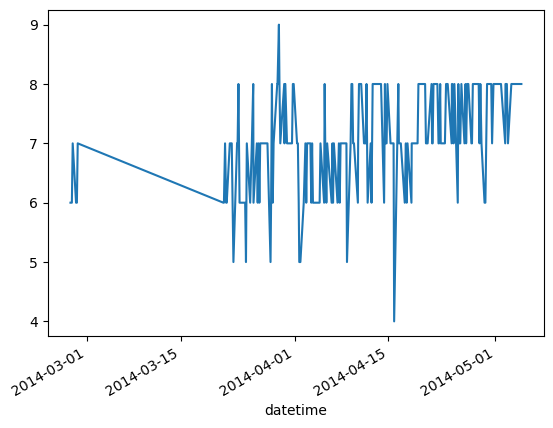

In [84]:
subject_mood = vdata["mood"]["AS14.01"]
subject_mood[subject_mood.notnull()].plot()

<Axes: xlabel='datetime'>

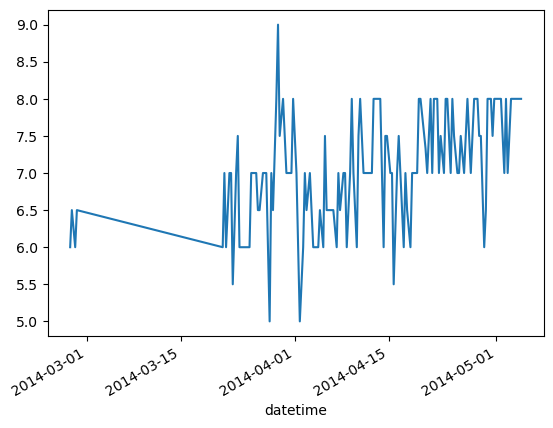

In [117]:
ts = vdata["mood"]["AS14.01"]
daily_ts = ts.resample("6H").mean()
daily_ts[daily_ts.notnull()].plot()

<Axes: xlabel='datetime'>

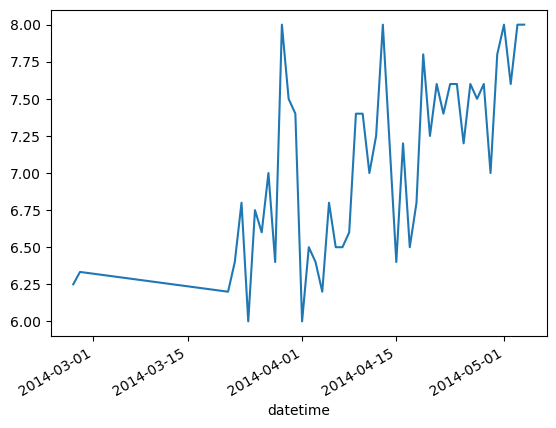

In [115]:
ts = vdata["mood"]["AS14.01"]
daily_ts = ts.resample("D").mean()
daily_ts[daily_ts.notnull()].plot()

<Axes: xlabel='datetime'>

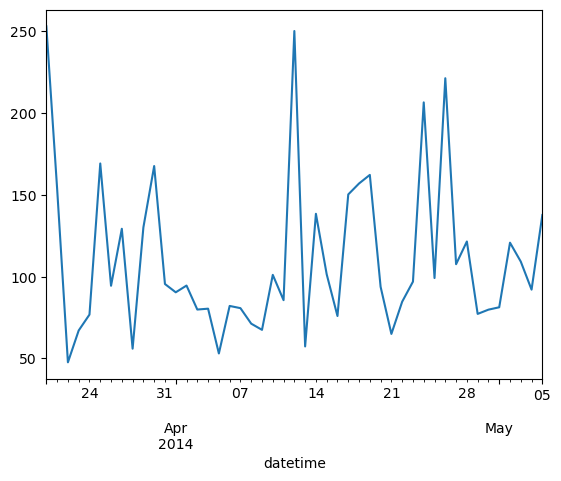

In [122]:
ts = vdata["screen"]["AS14.01"]
daily_ts = ts.resample("D").mean()
daily_ts[daily_ts.notnull()].plot()

<Axes: xlabel='datetime'>

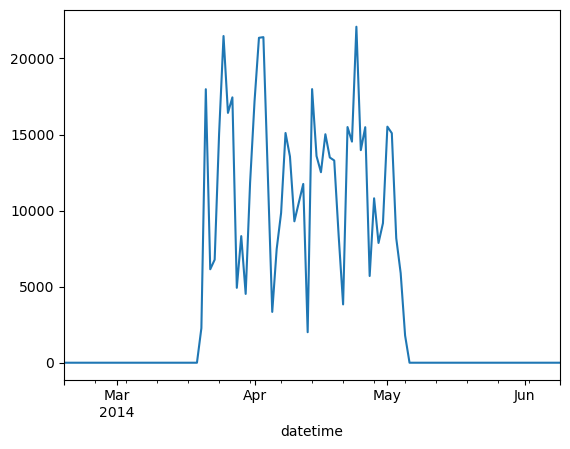

In [123]:
ts = vdata["screen"]["AS14.01"]
daily_ts = ts.resample("D").sum()
daily_ts[daily_ts.notnull()].plot()

## Alternative indexing
because we like to have fun

In [86]:
hdata = samples_deduped.pivot(columns="datetime", index=["id", "variable"], values="value")
hdata

datetime                    2014-02-17 07:00:52.197  2014-02-17 07:12:13.631  \
id      variable                                                               
AS14.01 activity                                NaN                      NaN   
        circumplex.arousal                      NaN                      NaN   
        circumplex.valence                      NaN                      NaN   
        mood                                    NaN                      NaN   
        screen                                  NaN                      NaN   
...                                             ...                      ...   
AS14.33 appCat.other                            NaN                      NaN   
        appCat.social                           NaN                      NaN   
        appCat.travel                           NaN                      NaN   
        appCat.unknown                          NaN                      NaN   
        appCat.utilities                        NaN                      NaN   

datetime                    2014-02-17 07:49:19.635  2014-02-17 08:57:16.313  \
id      variable                                                               
AS14.01 activity                                NaN                      NaN   
        circumplex.arousal                      NaN                      NaN   
        circumplex.valence                      NaN                      NaN   
        mood                                    NaN                      NaN   
        screen                                  NaN                      NaN   
...                                             ...                      ...   
AS14.33 appCat.other                            NaN                      NaN   
        appCat.social                           NaN                      NaN   
        appCat.travel                           NaN                      NaN   
        appCat.unknown                          NaN                      NaN   
        appCat.utilities                        NaN                      NaN   

datetime                    2014-02-17 08:58:58.471  2014-02-17 09:00:42.312  \
id      variable                                                               
AS14.01 activity                                NaN                      NaN   
        circumplex.arousal                      NaN                      NaN   
        circumplex.valence                      NaN                      NaN   
        mood                                    NaN                      NaN   
        screen                                  NaN                      NaN   
...                                             ...                      ...   
AS14.33 appCat.other                            NaN                      NaN   
        appCat.social                           NaN                      NaN   
        appCat.travel                           NaN                      NaN   
        appCat.unknown                          NaN                      NaN   
        appCat.utilities                        NaN                      NaN   

datetime                    2014-02-17 09:01:34.747  2014-02-17 09:48:49.536  \
id      variable                                                               
AS14.01 activity                                NaN                      NaN   
        circumplex.arousal                      NaN                      NaN   
        circumplex.valence                      NaN                      NaN   
        mood                                    NaN                      NaN   
        screen                                  NaN                      NaN   
...                                             ...                      ...   
AS14.33 appCat.other                            NaN                      NaN   
        appCat.social                           NaN                      NaN   
        appCat.travel                           NaN                      NaN 

In [87]:
hdata.index.names

FrozenList(['id', 'variable'])

In [88]:
hdata.index.get_level_values(0)

CategoricalIndex(['AS14.01', 'AS14.01', 'AS14.01', 'AS14.01', 'AS14.01',
                  'AS14.01', 'AS14.01', 'AS14.01', 'AS14.01', 'AS14.01',
                  ...
                  'AS14.33', 'AS14.33', 'AS14.33', 'AS14.33', 'AS14.33',
                  'AS14.33', 'AS14.33', 'AS14.33', 'AS14.33', 'AS14.33'],
                 categories=['AS14.01', 'AS14.02', 'AS14.03', 'AS14.05', ..., 'AS14.30', 'AS14.31', 'AS14.32', 'AS14.33'], ordered=False, dtype='category', name='id', length=464)

In [89]:
hdata.index.get_level_values(1)

CategoricalIndex(['activity', 'circumplex.arousal', 'circumplex.valence',
                  'mood', 'screen', 'appCat.builtin', 'appCat.communication',
                  'call', 'sms', 'appCat.entertainment',
                  ...
                  'call', 'sms', 'appCat.entertainment', 'appCat.finance',
                  'appCat.office', 'appCat.other', 'appCat.social',
                  'appCat.travel', 'appCat.unknown', 'appCat.utilities'],
                 categories=['activity', 'circumplex.arousal', 'circumplex.valence', 'mood', ..., 'appCat.travel', 'appCat.unknown', 'appCat.utilities', 'appCat.weather'], ordered=False, dtype='category', name='variable', length=464)

In [90]:
hdata.loc[("AS14.01", "mood")]

datetime
2014-02-17 07:00:52.197   NaN
2014-02-17 07:12:13.631   NaN
2014-02-17 07:49:19.635   NaN
2014-02-17 08:57:16.313   NaN
2014-02-17 08:58:58.471   NaN
                           ..
2014-06-08 11:03:34.453   NaN
2014-06-08 11:04:20.233   NaN
2014-06-08 11:04:36.299   NaN
2014-06-08 11:04:46.335   NaN
2014-06-09 00:00:00.000   NaN
Name: (AS14.01, mood), Length: 336907, dtype: float64

In [91]:
type(hdata.loc[("AS14.01", "mood")])

pandas.core.series.Series

In [92]:
hdata.loc["AS14.01"]

datetime,2014-02-17 07:00:52.197,2014-02-17 07:12:13.631,2014-02-17 07:49:19.635,2014-02-17 08:57:16.313,2014-02-17 08:58:58.471,2014-02-17 09:00:42.312,2014-02-17 09:01:34.747,2014-02-17 09:48:49.536,2014-02-17 09:52:02.075,2014-02-17 09:58:59.766,...,2014-06-08 10:00:00.000,2014-06-08 10:50:46.150,2014-06-08 10:50:46.178,2014-06-08 10:54:22.891,2014-06-08 11:00:00.000,2014-06-08 11:03:34.453,2014-06-08 11:04:20.233,2014-06-08 11:04:36.299,2014-06-08 11:04:46.335,2014-06-09 00:00:00.000
variable,,,,,,,,,,,,,,,,,,,,,
activity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
circumplex.arousal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
circumplex.valence,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mood,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
screen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
appCat.builtin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
appCat.communication,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
call,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sms,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [93]:
hdata.loc[("AS14.01",),]

datetime,2014-02-17 07:00:52.197,2014-02-17 07:12:13.631,2014-02-17 07:49:19.635,2014-02-17 08:57:16.313,2014-02-17 08:58:58.471,2014-02-17 09:00:42.312,2014-02-17 09:01:34.747,2014-02-17 09:48:49.536,2014-02-17 09:52:02.075,2014-02-17 09:58:59.766,...,2014-06-08 10:00:00.000,2014-06-08 10:50:46.150,2014-06-08 10:50:46.178,2014-06-08 10:54:22.891,2014-06-08 11:00:00.000,2014-06-08 11:03:34.453,2014-06-08 11:04:20.233,2014-06-08 11:04:36.299,2014-06-08 11:04:46.335,2014-06-09 00:00:00.000
variable,,,,,,,,,,,,,,,,,,,,,
activity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
circumplex.arousal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
circumplex.valence,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mood,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
screen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
appCat.builtin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
appCat.communication,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
call,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sms,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Observations per subject

<Axes: >

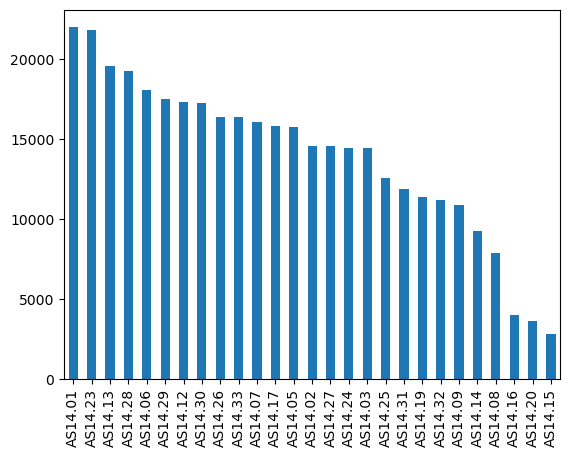

In [22]:
samples["id"].value_counts().plot(kind="bar")

## Observations per variables

<Axes: >

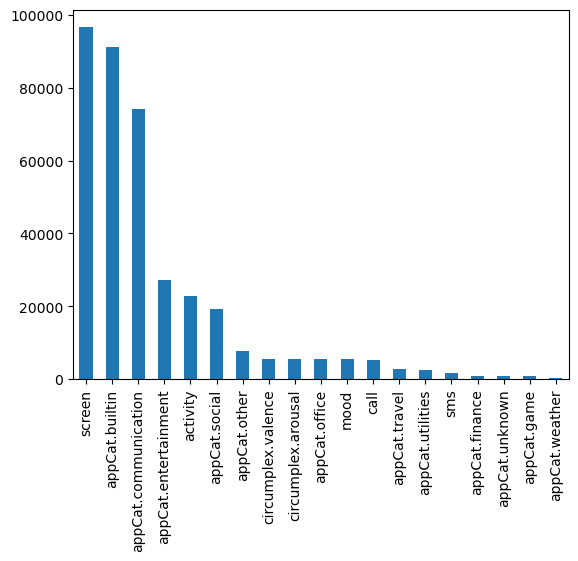

In [23]:
samples['variable'].value_counts().plot(kind="bar")

In [24]:
as1401 = samples[(samples["id"] == "AS14.01") & (samples["variable"] == "mood")]
as1415 = samples[(samples["id"] == "AS14.15") & (samples["variable"] == "mood")]
as1401

,id,datetime,variable,value
1,AS14.01,2014-02-26 13:00:00,mood,6.0
2,AS14.01,2014-02-26 15:00:00,mood,6.0
3,AS14.01,2014-02-26 18:00:00,mood,6.0
4,AS14.01,2014-02-26 21:00:00,mood,7.0
5,AS14.01,2014-02-27 09:00:00,mood,6.0
...,...,...,...,...
218,AS14.01,2014-05-03 21:00:00,mood,8.0
219,AS14.01,2014-05-04 11:00:00,mood,8.0
220,AS14.01,2014-05-04 12:00:00,mood,8.0
221,AS14.01,2014-05-04 15:00:00,mood,8.0


In [25]:
samples["id"].unique()

['AS14.01', 'AS14.02', 'AS14.03', 'AS14.05', 'AS14.06', ..., 'AS14.29', 'AS14.30', 'AS14.31', 'AS14.32', 'AS14.33']
Length: 27
Categories (27, object): ['AS14.01', 'AS14.02', 'AS14.03', 'AS14.05', ..., 'AS14.30', 'AS14.31', 'AS14.32', 'AS14.33']

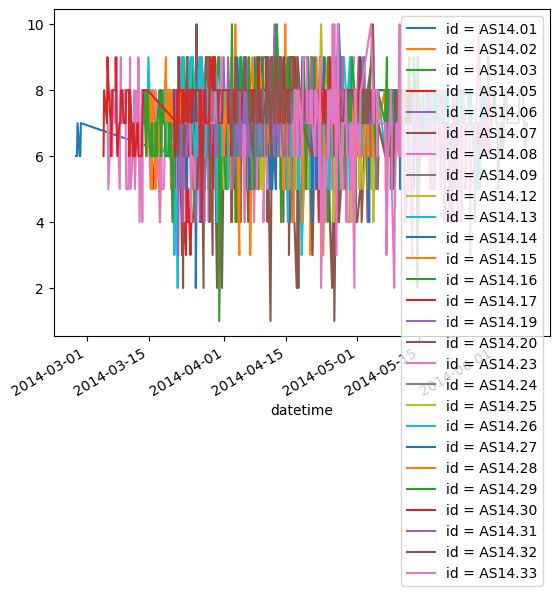

In [26]:
fig, ax = plt.subplots()
for i in samples["id"].unique():
    samples[(samples["id"] == i) & (samples["variable"] == "mood")].plot(x="datetime", y="value", ax=ax, label='id = %s'%i)


In [44]:
samples_series_1.loc[("AS14.01", "mood")]

datetime
2014-02-17 07:00:52.197   NaN
2014-02-17 07:12:13.631   NaN
2014-02-17 07:49:19.635   NaN
2014-02-17 08:57:16.313   NaN
2014-02-17 08:58:58.471   NaN
                           ..
2014-06-08 11:03:34.453   NaN
2014-06-08 11:04:20.233   NaN
2014-06-08 11:04:36.299   NaN
2014-06-08 11:04:46.335   NaN
2014-06-09 00:00:00.000   NaN
Name: (AS14.01, mood), Length: 336907, dtype: float64

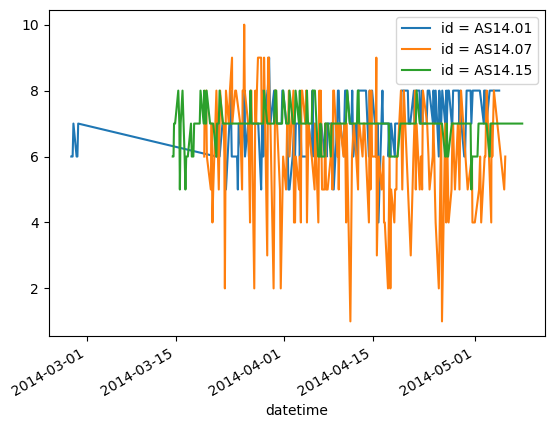

In [27]:
fig, ax = plt.subplots()
for i in ["AS14.01", "AS14.07", "AS14.15"]:
    samples[(samples["id"] == i) & (samples["variable"] == "mood")].plot(x="datetime", y="value", ax=ax, label='id = %s'%i)


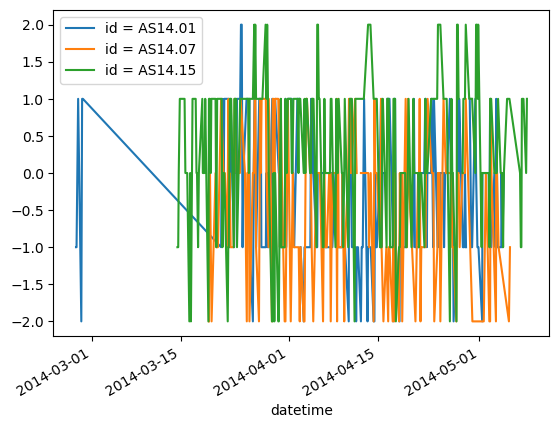

In [28]:
fig, ax = plt.subplots()
for i in ["AS14.01", "AS14.07", "AS14.15"]:
    samples[(samples["id"] == i) & (samples["variable"] == "circumplex.arousal")].plot(x="datetime", y="value", ax=ax, label='id = %s'%i)


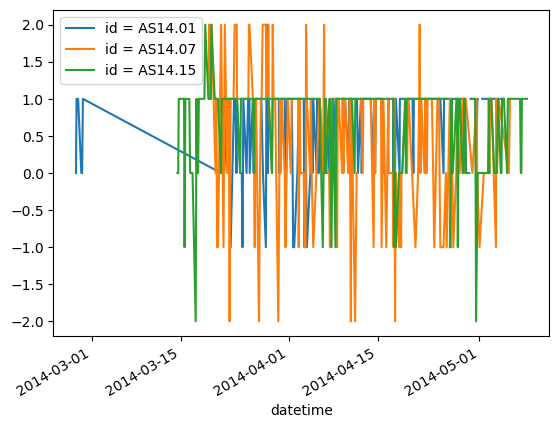

In [29]:
fig, ax = plt.subplots()
for i in ["AS14.01", "AS14.07", "AS14.15"]:
    samples[(samples["id"] == i) & (samples["variable"] == "circumplex.valence")].plot(x="datetime", y="value", ax=ax, label='id = %s'%i)


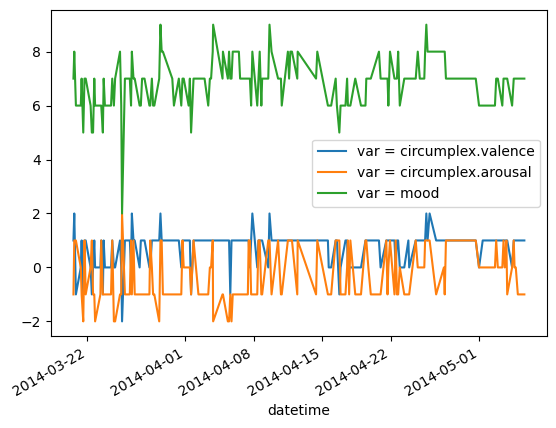

In [30]:
fig, ax = plt.subplots()
i = "AS14.14"
for v in ["circumplex.valence", "circumplex.arousal", "mood"]:
    samples[(samples["id"] == i) & (samples["variable"] == v)].plot(x="datetime", y="value", ax=ax, label='var = %s'%v)


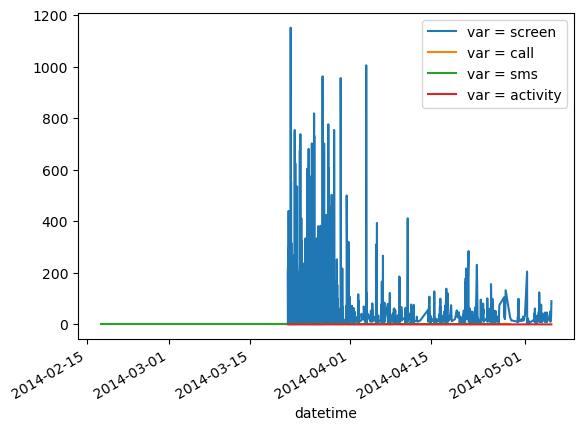

In [31]:
fig, ax = plt.subplots()
i = "AS14.14"
for v in ["screen", "call", "sms", "activity"]:
    samples[(samples["id"] == i) & (samples["variable"] == v)].plot(x="datetime", y="value", ax=ax, label='var = %s'%v)


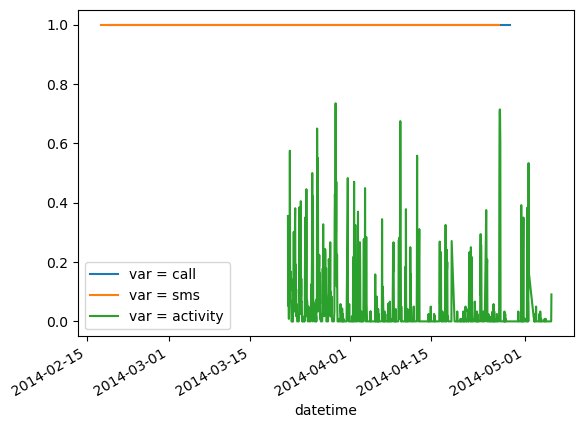

In [94]:
fig, ax = plt.subplots()
i = "AS14.14"
for v in ["call", "sms", "activity"]:
    samples[(samples["id"] == i) & (samples["variable"] == v)].plot(x="datetime", y="value", ax=ax, label='var = %s'%v)


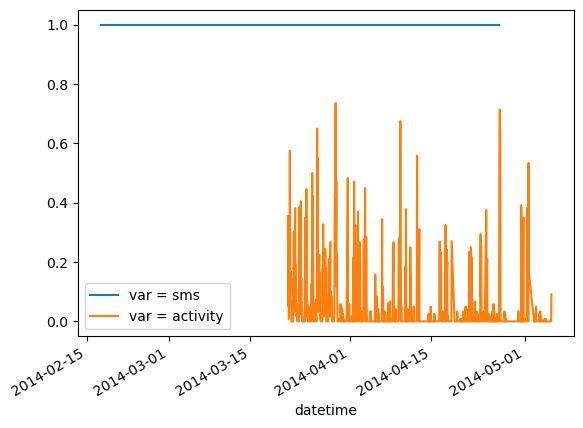

In [95]:
fig, ax = plt.subplots()
i = "AS14.14"
for v in ["sms", "activity"]:
    samples[(samples["id"] == i) & (samples["variable"] == v)].plot(x="datetime", y="value", ax=ax, label='var = %s'%v)


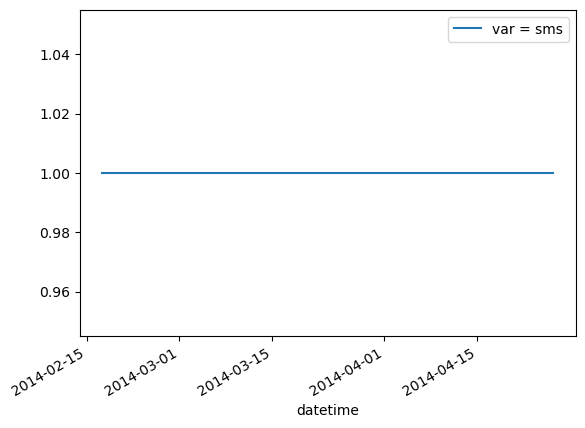

In [96]:
fig, ax = plt.subplots()
i = "AS14.14"
for v in ["sms"]:
    samples[(samples["id"] == i) & (samples["variable"] == v)].plot(x="datetime", y="value", ax=ax, label='var = %s'%v)
